<a href="https://colab.research.google.com/github/NikhilaArutla/Nikhila_INFO5731_Spring2025/blob/main/Group_6_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Loading the datasets
cnn_data = pd.read_excel("/workspace/cnn_1000.xlsx")
pubmed_data = pd.read_excel("/workspace/pubmed_1000.xlsx")

# Displaying basic info
print("CNN_DATA_BASIC_INFO" , cnn_data.info())
print("PUBMED_DATA_BASIC_INFO" , pubmed_data.info())

# Displaying first few rows
print("CNN_DATA_FIRST_FEW_ROWS" , cnn_data.head())
print("PUBMED_DATA_FIRST_FEW_ROWS" , pubmed_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-null   int64 
 1   url_hash      1000 non-null   object
 2   original_doc  999 non-null    object
 3   ref_sum       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
CNN_DATA_BASIC_INFO None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1000 non-null   int64 
 1   original_doc   1000 non-null   object
 2   ref_sum        1000 non-null   object
 3   section_names  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
PUBMED_DATA_BASIC_INFO None
CNN_DATA_FIRST_FEW_ROWS    Unnamed: 0                                  url_hash  \
0           0  148960d4ed34939c6fcca34df32

In [ ]:
print("CNN_DATA_COLUMNS")
print(cnn_data.isnull().sum())
print("PUBMED_DATA_COLUMNS")
print(pubmed_data.isnull().sum())


CNN_DATA_COLUMNS
Unnamed: 0      0
url_hash        0
original_doc    1
ref_sum         0
dtype: int64
PUBMED_DATA_COLUMNS
Unnamed: 0       0
original_doc     0
ref_sum          0
section_names    0
dtype: int64


In [ ]:
print("CNN_DATA_DUPLICATES" , cnn_data.duplicated().sum())
print("PUBMED_DATA_DUPLICATES" , pubmed_data.duplicated().sum())

CNN_DATA_DUPLICATES 0
PUBMED_DATA_DUPLICATES 0


In [ ]:
cnn_data = cnn_data.drop_duplicates()
pubmed_data = pubmed_data.drop_duplicates()

cnn_data.drop_duplicates(subset=['original_doc', 'ref_sum'], inplace=True)
pubmed_data.drop_duplicates(subset=['original_doc', 'ref_sum'], inplace=True)

print("CNN_DATA_Before:", cnn_data.shape)
cnn_data.drop_duplicates(inplace=True)
print("CNN_DATA_After:", cnn_data.shape)

print("PUBMED_DATA_Before:", pubmed_data.shape)
pubmed_data.drop_duplicates(inplace=True)
print("PUBMED_DATA_After:", pubmed_data.shape)


CNN_DATA_Before: (1000, 4)
CNN_DATA_After: (1000, 4)
PUBMED_DATA_Before: (1000, 4)
PUBMED_DATA_After: (1000, 4)


In [ ]:
print("CNN_DATA_Before:", cnn_data.shape)
cnn_data.dropna(subset=['original_doc'], inplace=True)
print("CNN_DATA_After:", cnn_data.shape)

print("PUBMED_DATA_Before:", pubmed_data.shape)
pubmed_data.dropna(subset=['original_doc'], inplace=True)
print("PUBMED_DATA_After:", pubmed_data.shape)


CNN_DATA_Before: (1000, 4)
CNN_DATA_After: (999, 4)
PUBMED_DATA_Before: (1000, 4)
PUBMED_DATA_After: (1000, 4)


In [ ]:
import re

print("CNN_DATA_COLUMNS")
print(cnn_data.columns)
print("PUBMED_DATA_COLUMNS")
print(pubmed_data.columns)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

cnn_data['original_doc_cleaned'] = cnn_data['original_doc'].apply(clean_text)
cnn_data['ref_sum_cleaned'] = cnn_data['ref_sum'].apply(clean_text)

pubmed_data['original_doc_cleaned'] = pubmed_data['original_doc'].apply(clean_text)
pubmed_data['ref_sum_cleaned'] = pubmed_data['ref_sum'].apply(clean_text)


CNN_DATA_COLUMNS
Index(['Unnamed: 0', 'url_hash', 'original_doc', 'ref_sum'], dtype='object')
PUBMED_DATA_COLUMNS
Index(['Unnamed: 0', 'original_doc', 'ref_sum', 'section_names'], dtype='object')


In [ ]:
cnn_data = cnn_data.drop(columns=['Unnamed: 0'])
pubmed_data = pubmed_data.drop(columns=['Unnamed: 0'])
print("CNN_DATA_COLUMNS")
print(cnn_data.columns)
print("PUBMED_DATA_COLUMNS")
print(pubmed_data.columns)

CNN_DATA_COLUMNS
Index(['url_hash', 'original_doc', 'ref_sum', 'original_doc_cleaned',
       'ref_sum_cleaned'],
      dtype='object')
PUBMED_DATA_COLUMNS
Index(['original_doc', 'ref_sum', 'section_names', 'original_doc_cleaned',
       'ref_sum_cleaned'],
      dtype='object')


In [ ]:
# Calculating word count for 'original_doc_cleaned' and 'ref_sum_cleaned'
cnn_data['original_doc_word_count'] = cnn_data['original_doc_cleaned'].apply(lambda x: len(x.split()))
cnn_data['ref_sum_word_count'] = cnn_data['ref_sum_cleaned'].apply(lambda x: len(x.split()))

pubmed_data['original_doc_word_count'] = pubmed_data['original_doc_cleaned'].apply(lambda x: len(x.split()))
pubmed_data['ref_sum_word_count'] = pubmed_data['ref_sum_cleaned'].apply(lambda x: len(x.split()))

# Displaying the word count statistics
print("CNN_DATA_Word_Count_Statistics:")
print(cnn_data[['original_doc_word_count', 'ref_sum_word_count']].describe())
print("\nPUBMED_DATA_Word_Count_Statistics:")
print(pubmed_data[['original_doc_word_count', 'ref_sum_word_count']].describe())


CNN_DATA_Word_Count_Statistics:
       original_doc_word_count  ref_sum_word_count
count               999.000000          999.000000
mean                670.366366           49.394394
std                 347.477956           10.511021
min                  65.000000           13.000000
25%                 393.000000           42.000000
50%                 626.000000           50.000000
75%                 889.000000           57.000000
max                1797.000000           78.000000

PUBMED_DATA_Word_Count_Statistics:
       original_doc_word_count  ref_sum_word_count
count              1000.000000         1000.000000
mean               2378.021000          176.267000
std                1309.418518           65.801775
min                 109.000000           29.000000
25%                1291.250000          130.000000
50%                2165.000000          183.000000
75%                3221.000000          223.000000
max                5280.000000          331.000000


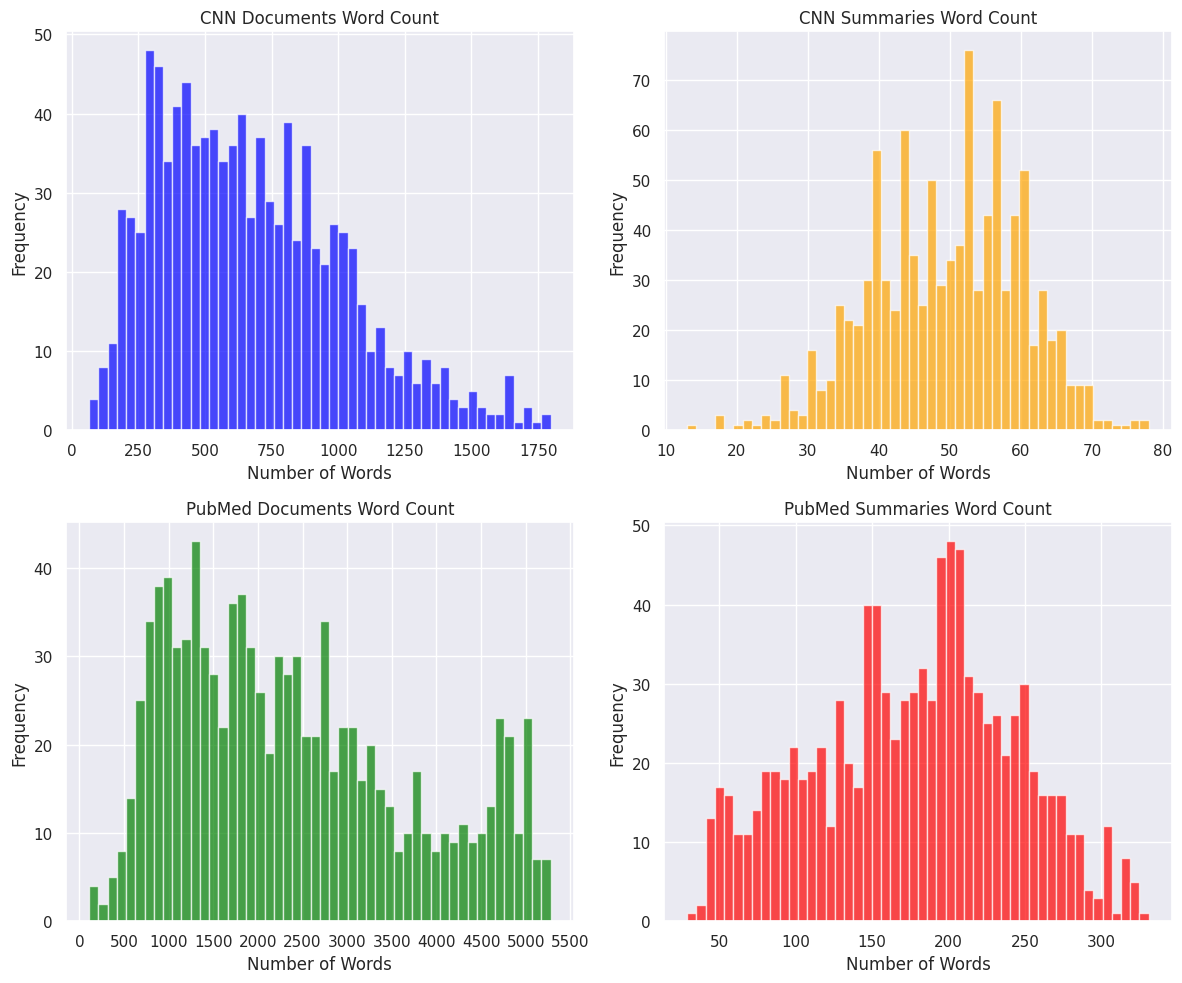

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Createing 2x2 subplot grid for separate graphs
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Determining x-axis tick intervals (500 steps)
x_ticks = np.arange(0, max(
    cnn_data['original_doc_word_count'].max(),
    cnn_data['ref_sum_word_count'].max(),
    pubmed_data['original_doc_word_count'].max(),
    pubmed_data['ref_sum_word_count'].max()
) + 500, 500)

# CNN Documents
axes[0, 0].hist(cnn_data['original_doc_word_count'], bins=50, color='blue', alpha=0.7)
axes[0, 0].set_title("CNN Documents Word Count")
axes[0, 0].set_xlabel("Number of Words")
axes[0, 0].set_ylabel("Frequency")

# CNN Summaries
axes[0, 1].hist(cnn_data['ref_sum_word_count'], bins=50, color='orange', alpha=0.7)
axes[0, 1].set_title("CNN Summaries Word Count")
axes[0, 1].set_xlabel("Number of Words")
axes[0, 1].set_ylabel("Frequency")

# PubMed Documents
axes[1, 0].hist(pubmed_data['original_doc_word_count'], bins=50, color='green', alpha=0.7)
axes[1, 0].set_title("PubMed Documents Word Count")
axes[1, 0].set_xlabel("Number of Words")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_xticks(x_ticks)


# PubMed Summaries
axes[1, 1].hist(pubmed_data['ref_sum_word_count'], bins=50, color='red', alpha=0.7)
axes[1, 1].set_title("PubMed Summaries Word Count")
axes[1, 1].set_xlabel("Number of Words")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
import os

# Ensuring the 'results' directory exists
os.makedirs("/workspace/", exist_ok=True)

# Saving cleaned datasets with word counts to CSV
cnn_data.to_csv("/workspace/CNN_cleaned.csv", index=False)
pubmed_data.to_csv("/workspace/PubMed_cleaned.csv", index=False)

print(" Cleaned datasets saved successfully in '/workspace/results/' folder!")


 Cleaned datasets saved successfully in '/workspace/results/' folder!


In [ ]:
!pip install torch transformers accelerate pandas openpyxl

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip


In [ ]:
#hugging face token
from huggingface_hub import login
from getpass import getpass

huggingface_token = getpass("Enter your Hugging Face Token: ")
login(huggingface_token)

Enter your Hugging Face Token:  ········


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch

#Model
model_name = "meta-llama/Llama-3.1-8B-Instruct"

# Setting device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Loading model {model_name} on {device}...")

# Loading model and tokenizer
model = AutoModelForCausalLM.from_pretrained(model_name, trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

# Creating generation pipeline
qa_pipeline = pipeline("text-generation", model=model, tokenizer=tokenizer)

print("Model loaded successfully!")

Loading model meta-llama/Llama-3.1-8B-Instruct on cuda...


config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

Device set to use cuda:0


Model loaded successfully!


In [ ]:
import pandas as pd

cnn_file_path = "CNN_cleaned.csv"
pubmed_file_path = "PubMed_cleaned.csv"


# Loading datasets
cnn_df = pd.read_csv(cnn_file_path)
pubmed_df = pd.read_csv(pubmed_file_path)

# Ensuring the 'original_doc' column exists
if "original_doc" not in cnn_df.columns or "original_doc" not in pubmed_df.columns:
    raise KeyError("'original_doc' column not found in one of the datasets.")

In [ ]:
cnn_df.head()

,url_hash,original_doc,ref_sum,original_doc_cleaned,ref_sum_cleaned,original_doc_word_count,ref_sum_word_count
0,148960d4ed34939c6fcca34df3277d983841caea,"silver spring , maryland -lrb- cnn -rrb- -- as...",<s> thrift stores worry new lead rules will fo...,silver spring maryland lrb cnn rrb as marily...,s thrift stores worry new lead rules will forc...,822,63
1,917ca26a3a38a2832c61e32a67a84385c3834a4f,"kiev , ukraine -lrb- cnn -rrb- -- a second rou...",<s> new : second round of talks between protes...,kiev ukraine lrb cnn rrb a second round of t...,s new second round of talks between protester...,905,56
2,68189c021b148527c2bf459a79a5d2f6104c8785,-lrb- mashable -rrb- -- twitter has taken a bi...,<s> twitter has been working to improve securi...,lrb mashable rrb twitter has taken a big step...,s twitter has been working to improve security...,174,34
3,3527cf35fe12badfe319214a8a66aa4e76552fba,"-lrb- cnn -rrb- -- susan rice , who has been n...",<s> david rothkopf : susan rice is a natural c...,lrb cnn rrb susan rice who has been named pr...,s david rothkopf susan rice is a natural choi...,1015,60
4,dffae6025a5545ee33d2871223f916116c0c3524,washington -lrb- cnn -rrb- -- the death of ben...,<s> watergate reporters woodward and bernstein...,washington lrb cnn rrb the death of ben bradl...,s watergate reporters woodward and bernstein ...,352,36


In [ ]:
pubmed_df.head()

,original_doc,ref_sum,section_names,original_doc_cleaned,ref_sum_cleaned,original_doc_word_count,ref_sum_word_count
0,six a17 bac and one fosmid library were used t...,legumes ( fabaceae or leguminosae ) are uniqu...,METHODS SUMMARY\nDNA sequencing\nRNA sequencin...,six a17 bac and one fosmid library were used t...,legumes fabaceae or leguminosae are unique a...,254,220
1,neurotransmitters ( nts ) are signaling molecu...,a simple and rapid liquid chromatography tand...,1. Introduction\n2. Materials and Methods\n3. ...,neurotransmitters nts are signaling molecule...,a simple and rapid liquid chromatography tande...,3920,240
2,"aging , a multifactorial process of enormous c...",aging has been defined as the changes that oc...,Introduction\nExperimental\nDrugs and chemical...,aging a multifactorial process of enormous co...,aging has been defined as the changes that occ...,2677,194
3,triple - negative breast cancer ( tnbc ) is ch...,this is a case study of a 52-year - old femal...,Introduction\nCase Report\nDiscussion,triple negative breast cancer tnbc is chara...,this is a case study of a 52year old female p...,1781,254
4,the number of total joint arthroplasties ( tja...,total joint arthroplasty ( tja ) is one of th...,Introduction\nPre-operative factors\nIntra-ope...,the number of total joint arthroplasties tjas...,total joint arthroplasty tja is one of the m...,2153,253


In [ ]:
import re
import pandas as pd
from tqdm import tqdm

def extract_questions(generated_text):
    """Extract and re-enumerate the numbered questions cleanly."""
    questions = re.findall(r'\d+\.\s(.*?)(?=\n\d+\.|\Z)', generated_text, re.DOTALL)


    cleaned_questions = []
    for q in questions:
        q = q.strip()
        if q and len(q) > 5 and q.lower() != "assistant":
            cleaned_questions.append(q)

    # RenumberING properly
    numbered_questions = [f"{i+1}. {q}" for i, q in enumerate(cleaned_questions[:15])]
    return "\n".join(numbered_questions)

# Defining the prompt template
prompt_template = """<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are an AI designed to generate 15 unique, meaningful, and diverse questions based on a given document.
Cover these question types:
- Who, What, When
- Why, How
- Yes/No
- Multiple-choice
- Open-ended analysis

Be distinct and ensure all 15 questions are different.<|eot_id|><|start_header_id|>user<|end_header_id|>
DOCUMENT:
{document_text}

Generate exactly 15 questions in this format:
1.
2.
...
15. <|eot_id|><|start_header_id|>assistant<|end_header_id|>
1."""

def process_in_batches(df, batch_size=25, output_csv="llama_questions.csv"):
    results = []

    for i in tqdm(range(0, len(df), batch_size), desc="Processing Batches"):
        batch = df.iloc[i:i+batch_size].copy()
        generated_texts = []

        for doc in batch['original_doc']:
            if pd.isna(doc) or not isinstance(doc, str):
                generated_texts.append("No questions generated.")
                continue

            # Preparing the prompt
            truncated_doc = tokenizer.decode(
                tokenizer.encode(doc, max_length=3000, truncation=True),
                skip_special_tokens=True
            )
            prompt = prompt_template.format(document_text=truncated_doc)

            # Generating questions
            inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
            outputs = model.generate(
                **inputs,
                max_new_tokens=1000,
                temperature=0.7,
                top_p=0.9,
                do_sample=True,
                pad_token_id=tokenizer.eos_token_id
            )

            # Decoding and extracting only the questions
            full_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
            questions_part = full_output.split("<|start_header_id|>assistant<|end_header_id|>")[-1].strip()
            clean_questions = extract_questions(questions_part)
            generated_texts.append(clean_questions)

        batch['questions'] = generated_texts
        results.append(batch)

    final_df = pd.concat(results)
    final_df.to_csv(output_csv, index=False)
    print(f"Clean questions saved to {output_csv}!")


In [ ]:

cnn_output_file = "/workspace/cnn_questionsgenerated.csv"
process_in_batches(cnn_df, batch_size=25, output_csv=cnn_output_file)

try:
    loaded_cnn_df = pd.read_csv(cnn_output_file)
    print("\nHead of CNN Questions (Numbered 1-15):")
    print(loaded_cnn_df['questions'].head())
except FileNotFoundError:
    print(f"Error: The file '{cnn_output_file}' was not found.")



Processing Batches: 100%|██████████| 40/40 [3:02:12<00:00, 273.32s/it]  


Clean questions saved to /workspace/cnn_questionsgenerated.csv!

Head of CNN Questions (Numbered 1-15):
0    1. Who is Marilyn Seitz, and what is her role ...
1    1. Who is the Ukrainian president involved in ...
2    1. Who has taken a step towards improving acco...
3    1. Who is the person named as President Barack...
4    1. Who was the iconic editor of the Washington...
Name: questions, dtype: object


In [ ]:
import pandas as pd

cnn_df = pd.read_csv('/workspace/cnn_questionsgenerated.csv')
cnn_df.head()


,url_hash,original_doc,ref_sum,original_doc_cleaned,ref_sum_cleaned,original_doc_word_count,ref_sum_word_count,questions
0,148960d4ed34939c6fcca34df3277d983841caea,"silver spring , maryland -lrb- cnn -rrb- -- as...",<s> thrift stores worry new lead rules will fo...,silver spring maryland lrb cnn rrb as marily...,s thrift stores worry new lead rules will forc...,822,63,"1. Who is Marilyn Seitz, and what is her role ..."
1,917ca26a3a38a2832c61e32a67a84385c3834a4f,"kiev , ukraine -lrb- cnn -rrb- -- a second rou...",<s> new : second round of talks between protes...,kiev ukraine lrb cnn rrb a second round of t...,s new second round of talks between protester...,905,56,1. Who is the Ukrainian president involved in ...
2,68189c021b148527c2bf459a79a5d2f6104c8785,-lrb- mashable -rrb- -- twitter has taken a bi...,<s> twitter has been working to improve securi...,lrb mashable rrb twitter has taken a big step...,s twitter has been working to improve security...,174,34,1. Who has taken a step towards improving acco...
3,3527cf35fe12badfe319214a8a66aa4e76552fba,"-lrb- cnn -rrb- -- susan rice , who has been n...",<s> david rothkopf : susan rice is a natural c...,lrb cnn rrb susan rice who has been named pr...,s david rothkopf susan rice is a natural choi...,1015,60,1. Who is the person named as President Barack...
4,dffae6025a5545ee33d2871223f916116c0c3524,washington -lrb- cnn -rrb- -- the death of ben...,<s> watergate reporters woodward and bernstein...,washington lrb cnn rrb the death of ben bradl...,s watergate reporters woodward and bernstein ...,352,36,1. Who was the iconic editor of the Washington...


In [ ]:
# PUMBED dataset:
pumbed_output_file = "/workspace/pumbed_questionsgenerated.csv"
process_in_batches(pubmed_df, batch_size=25, output_csv=pumbed_output_file)

try:
    loaded_pumbed_df = pd.read_csv(pumbed_output_file)
    print("\nHead of PUMBED Questions (Numbered 1-15):")
    print(loaded_pumbed_df['questions'].head())
except FileNotFoundError:
    print(f"Error: The file '{pumbed_output_file}' was not found.")


Processing Batches: 100%|██████████| 40/40 [4:39:31<00:00, 419.29s/it]  


Clean questions saved to /workspace/pumbed_questionsgenerated.csv!

Head of PUMBED Questions (Numbered 1-15):
0    1. Who were the researchers involved in creati...
1    1. the most abundant ion in the product ion sp...
2    1. Who is the principal scientist who gifted t...
3    1. three weeks after progressing, the patient ...
4    1. Who is the target audience of the guideline...
Name: questions, dtype: object


In [ ]:
import pandas as pd

# Loading the CSV file
cnn_df = pd.read_csv('/workspace/cnn_questionsgenerated.csv')
cnn_df.head()

,url_hash,original_doc,ref_sum,original_doc_cleaned,ref_sum_cleaned,original_doc_word_count,ref_sum_word_count,questions
0,148960d4ed34939c6fcca34df3277d983841caea,"silver spring , maryland -lrb- cnn -rrb- -- as...",<s> thrift stores worry new lead rules will fo...,silver spring maryland lrb cnn rrb as marily...,s thrift stores worry new lead rules will forc...,822,63,"1. Who is Marilyn Seitz, and what is her role ..."
1,917ca26a3a38a2832c61e32a67a84385c3834a4f,"kiev , ukraine -lrb- cnn -rrb- -- a second rou...",<s> new : second round of talks between protes...,kiev ukraine lrb cnn rrb a second round of t...,s new second round of talks between protester...,905,56,1. Who is the Ukrainian president involved in ...
2,68189c021b148527c2bf459a79a5d2f6104c8785,-lrb- mashable -rrb- -- twitter has taken a bi...,<s> twitter has been working to improve securi...,lrb mashable rrb twitter has taken a big step...,s twitter has been working to improve security...,174,34,1. Who has taken a step towards improving acco...
3,3527cf35fe12badfe319214a8a66aa4e76552fba,"-lrb- cnn -rrb- -- susan rice , who has been n...",<s> david rothkopf : susan rice is a natural c...,lrb cnn rrb susan rice who has been named pr...,s david rothkopf susan rice is a natural choi...,1015,60,1. Who is the person named as President Barack...
4,dffae6025a5545ee33d2871223f916116c0c3524,washington -lrb- cnn -rrb- -- the death of ben...,<s> watergate reporters woodward and bernstein...,washington lrb cnn rrb the death of ben bradl...,s watergate reporters woodward and bernstein ...,352,36,1. Who was the iconic editor of the Washington...


In [ ]:
import pandas as pd
import torch
from tqdm import tqdm
import os
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

# Loading Model and Tokenizer ---
model_name = "meta-llama/Llama-3.1-8B-Instruct"

print(" Loading tokenizer...")
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

print(" Loading model...")
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    trust_remote_code=True
).to("cuda" if torch.cuda.is_available() else "cpu")

#Pipeline
print(" Initializing pipeline...")
qa_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1,
    pad_token_id=tokenizer.eos_token_id
)


 Loading tokenizer...
 Loading model...


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Device set to use cuda:0


 Initializing pipeline...


In [ ]:
import pandas as pd
from tqdm import tqdm

input_file = '/workspace/cnn_questionsgenerated.csv'
output_file = '/workspace/cnn_questions_generated_with_Adoc_Asum.csv'

batch_size = 20
limit_rows = 100


def generate_answer(question, doc):
    if pd.isna(question) or not isinstance(question, str) or len(question.strip()) < 5:
        return "Invalid question"

    try:
        prompt = f"""
Answer the following question based only on the provided document.
If the answer cannot be found explicitly in the document, respond exactly with: "Not mentioned in the document."

Document:
{doc}

Question:
{question}

Answer:
"""
        response = qa_pipeline(
            prompt,
            max_new_tokens=50,
            temperature=0.3,
            do_sample=True,
            top_p=0.9,
            pad_token_id=tokenizer.eos_token_id
        )

        generated_answer = response[0]["generated_text"].strip()
        answer = generated_answer.split("Answer:")[-1].strip()

        if "unknown" in answer.lower() or len(answer.split()) < 3 or "not found" in answer.lower():
            return "Answer not found in the document."

        return answer

    except Exception as e:
        print(f" Error generating answer: {e}")
        return "Error generating answer."


def generate_adoc_asum_for_row(row):
    questions = str(row["questions"]).split('\n')
    adoc_answers = []
    asum_answers = []

    for i, question in enumerate(questions, start=1):
        if question.strip():
            adoc = generate_answer(question, row["original_doc_cleaned"])
            asum = generate_answer(question, row["ref_sum_cleaned"])
            adoc_answers.append(f"{i}A. {adoc}")
            asum_answers.append(f"{i}A. {asum}")
        else:
            adoc_answers.append(f"{i}A. No question provided.")
            asum_answers.append(f"{i}A. No question provided.")

    return "\n".join(adoc_answers), "\n".join(asum_answers)

try:
    print(" Loading input file...")
    df = pd.read_csv(input_file)

    # LIMIT to only first 100 rows
    df = df.iloc[:limit_rows]

    tqdm.pandas(desc="Processing each document")

    final_df = pd.DataFrame()

    for start in tqdm(range(0, len(df), batch_size), desc="Processing batches"):
        batch_df = df.iloc[start:start+batch_size]

        results = batch_df.progress_apply(generate_adoc_asum_for_row, axis=1)
        batch_df["Adoc"], batch_df["Asum"] = zip(*results)

        final_df = pd.concat([final_df, batch_df], ignore_index=True)


        final_df.to_csv(output_file, index=False, encoding="utf-8")
        print(f" Saved up to document {start+batch_size}")

    print(f"\n Completed! File saved to {output_file}")

except Exception as e:
    print(f"\n Error: {str(e)}")


 Loading input file...


Processing each document: 100%|██████████| 20/20 [21:58<00:00, 65.93s/it]
/tmp/ipykernel_21583/131411346.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["Adoc"], batch_df["Asum"] = zip(*results)
/tmp/ipykernel_21583/131411346.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["Adoc"], batch_df["Asum"] = zip(*results)
Processing batches:  20%|██        | 1/5 [21:58<1:27:54, 1318.53s/it]

 Saved up to document 20



Processing each document: 100%|██████████| 20/20 [25:00<00:00, 75.03s/it]
/tmp/ipykernel_21583/131411346.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["Adoc"], batch_df["Asum"] = zip(*results)
/tmp/ipykernel_21583/131411346.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["Adoc"], batch_df["Asum"] = zip(*results)
Processing batches:  40%|████      | 2/5 [46:59<1:11:16, 1425.63s/it]

 Saved up to document 40



Processing each document: 100%|██████████| 20/20 [24:05<00:00, 72.29s/it]
/tmp/ipykernel_21583/131411346.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["Adoc"], batch_df["Asum"] = zip(*results)
/tmp/ipykernel_21583/131411346.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["Adoc"], batch_df["Asum"] = zip(*results)
Processing batches:  60%|██████    | 3/5 [1:11:04<47:49, 1434.86s/it]

 Saved up to document 60



Processing each document: 100%|██████████| 20/20 [23:26<00:00, 70.33s/it]
/tmp/ipykernel_21583/131411346.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["Adoc"], batch_df["Asum"] = zip(*results)
/tmp/ipykernel_21583/131411346.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["Adoc"], batch_df["Asum"] = zip(*results)
Processing batches:  80%|████████  | 4/5 [1:34:31<23:43, 1423.70s/it]

 Saved up to document 80



Processing each document: 100%|██████████| 20/20 [20:29<00:00, 61.49s/it]
/tmp/ipykernel_21583/131411346.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["Adoc"], batch_df["Asum"] = zip(*results)
/tmp/ipykernel_21583/131411346.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["Adoc"], batch_df["Asum"] = zip(*results)
Processing batches: 100%|██████████| 5/5 [1:55:01<00:00, 1380.28s/it]

 Saved up to document 100

 Completed! File saved to /workspace/cnn_questions_generated_with_Adoc_Asum.csv


In [ ]:
cnn_qa_df= pd.read_csv("/workspace/cnn_questions_generated_with_Adoc_Asum.csv")
cnn_qa_df.head()

,url_hash,original_doc,ref_sum,original_doc_cleaned,ref_sum_cleaned,original_doc_word_count,ref_sum_word_count,questions,Adoc,Asum
0,148960d4ed34939c6fcca34df3277d983841caea,"silver spring , maryland -lrb- cnn -rrb- -- as...",<s> thrift stores worry new lead rules will fo...,silver spring maryland lrb cnn rrb as marily...,s thrift stores worry new lead rules will forc...,822,63,"1. Who is Marilyn Seitz, and what is her role ...",1A. Marilyn Seitz is the manager of the Pennyw...,1A. Not mentioned in the document. Not mentio...
1,917ca26a3a38a2832c61e32a67a84385c3834a4f,"kiev , ukraine -lrb- cnn -rrb- -- a second rou...",<s> new : second round of talks between protes...,kiev ukraine lrb cnn rrb a second round of t...,s new second round of talks between protester...,905,56,1. Who is the Ukrainian president involved in ...,"1A. Fruitless, but both parties decided to kee...",1A. Not mentioned in the document.\n2A. Not me...
2,68189c021b148527c2bf459a79a5d2f6104c8785,-lrb- mashable -rrb- -- twitter has taken a bi...,<s> twitter has been working to improve securi...,lrb mashable rrb twitter has taken a big step...,s twitter has been working to improve security...,174,34,1. Who has taken a step towards improving acco...,1A. Always use HTTPS\n2A. Always use https. (N...,"1A. Not mentioned in the document. However, it..."
3,3527cf35fe12badfe319214a8a66aa4e76552fba,"-lrb- cnn -rrb- -- susan rice , who has been n...",<s> david rothkopf : susan rice is a natural c...,lrb cnn rrb susan rice who has been named pr...,s david rothkopf susan rice is a natural choi...,1015,60,1. Who is the person named as President Barack...,1A. Susan Rice. She has been named President B...,1A. Answer not found in the document.\n2A. Not...
4,dffae6025a5545ee33d2871223f916116c0c3524,washington -lrb- cnn -rrb- -- the death of ben...,<s> watergate reporters woodward and bernstein...,washington lrb cnn rrb the death of ben bradl...,s watergate reporters woodward and bernstein ...,352,36,1. Who was the iconic editor of the Washington...,1A. Ben Bradlee. Not mentioned in the document...,1A. Bradlee. Not mentioned in the document. (H...


In [ ]:
import pandas as pd
from tqdm import tqdm

input_file = '/workspace/pumbed_questionsgenerated.csv'
output_file = '/workspace/pubmed_questions_generated_with_Adoc_Asum.csv'

max_questions_per_doc = 15
max_documents = 100
batch_size = 25

def generate_answer(question, doc):
    if pd.isna(question) or not isinstance(question, str) or len(question.strip()) < 5:
        return "Invalid question"

    try:
        prompt = f"""
Answer the following question based only on the provided document.
If the answer cannot be found explicitly in the document, respond exactly with: "Not mentioned in the document."

Document:
{doc}

Question:
{question}

Answer:
"""
        response = qa_pipeline(
            prompt,
            max_new_tokens=50,
            temperature=0.3,
            do_sample=True,
            top_p=0.9,
            pad_token_id=tokenizer.eos_token_id
        )

        generated_answer = response[0]["generated_text"].strip()
        answer = generated_answer.split("Answer:")[-1].strip()
        if "unknown" in answer.lower() or len(answer.split()) < 3:
            return "Answer not found in the document."
        return answer

    except Exception as e:
        print(f" Error generating answer: {e}")
        return "Error generating answer."


def generate_adoc_asum_for_row(row):
    questions = str(row["questions"]).split('\n')
    questions = [q for q in questions if q.strip()][:max_questions_per_doc]

    adoc_answers = []
    asum_answers = []

    for i, question in enumerate(questions, start=1):
        adoc = generate_answer(question, row["original_doc_cleaned"])
        asum = generate_answer(question, row["ref_sum_cleaned"])
        adoc_answers.append(f"{i}A. {adoc}")
        asum_answers.append(f"{i}A. {asum}")

    row["Adoc"] = "\n".join(adoc_answers)
    row["Asum"] = "\n".join(asum_answers)
    row["Questions"] = "\n".join(questions)
    return row


try:
    print(" Loading input file...")
    df = pd.read_csv(input_file)
    df = df.iloc[:max_documents]

    final_df = pd.DataFrame()

    for i in range(0, len(df), batch_size):
        batch_df = df.iloc[i:i + batch_size].copy()
        tqdm.pandas(desc=f" Processing batch {i // batch_size + 1}")
        batch_processed = batch_df.progress_apply(generate_adoc_asum_for_row, axis=1)
        final_df = pd.concat([final_df, batch_processed], ignore_index=True)
        final_df.to_csv(output_file, index=False)

    print(f"\n Done! Saved {len(final_df)} processed documents to {output_file}")

except Exception as e:
    print(f" Error: {str(e)}")


 Loading input file...


 Processing batch 4: 100%|██████████| 25/25 [39:05<00:00, 93.83s/it] 


 Done! Saved 100 processed documents to /workspace/pubmed_questions_generated_with_Adoc_Asum.csv


In [ ]:
pubmed_qa_df= pd.read_csv("/workspace/pubmed_questions_generated_with_Adoc_Asum.csv")
pubmed_qa_df.head()

,original_doc,ref_sum,section_names,original_doc_cleaned,ref_sum_cleaned,original_doc_word_count,ref_sum_word_count,questions,Adoc,Asum,Questions
0,six a17 bac and one fosmid library were used t...,legumes ( fabaceae or leguminosae ) are uniqu...,METHODS SUMMARY\nDNA sequencing\nRNA sequencin...,six a17 bac and one fosmid library were used t...,legumes fabaceae or leguminosae are unique a...,254,220,1. Who were the researchers involved in creati...,1A. Not mentioned in the document. The docume...,1A. Not mentioned in the document. (The docum...,1. Who were the researchers involved in creati...
1,neurotransmitters ( nts ) are signaling molecu...,a simple and rapid liquid chromatography tand...,1. Introduction\n2. Materials and Methods\n3. ...,neurotransmitters nts are signaling molecule...,a simple and rapid liquid chromatography tande...,3920,240,1. the most abundant ion in the product ion sp...,"1A. True. According to the text, the most abun...","1A. Not mentioned in the document. However, it...",1. the most abundant ion in the product ion sp...
2,"aging , a multifactorial process of enormous c...",aging has been defined as the changes that oc...,Introduction\nExperimental\nDrugs and chemical...,aging a multifactorial process of enormous co...,aging has been defined as the changes that occ...,2677,194,1. Who is the principal scientist who gifted t...,1A. Dr. T. K. Thankkappan. He is the principal...,1A. Not mentioned in the document. Not mentio...,1. Who is the principal scientist who gifted t...
3,triple - negative breast cancer ( tnbc ) is ch...,this is a case study of a 52-year - old femal...,Introduction\nCase Report\nDiscussion,triple negative breast cancer tnbc is chara...,this is a case study of a 52year old female p...,1781,254,"1. three weeks after progressing, the patient ...","1A. 2,000 mg / m orally twice a day for 2 week...","1A. Not mentioned in the document. However, it...","1. three weeks after progressing, the patient ..."
4,the number of total joint arthroplasties ( tja...,total joint arthroplasty ( tja ) is one of th...,Introduction\nPre-operative factors\nIntra-ope...,the number of total joint arthroplasties tjas...,total joint arthroplasty tja is one of the m...,2153,253,1. Who is the target audience of the guideline...,"1A. Not mentioned in the document. However, th...","1A. Not mentioned in the document. However, ba...",1. Who is the target audience of the guideline...


In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 129.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 99.2 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=72f26b34c0549262e54c8df3508b29abedfcf49afce1eda42947c878ca5fbe6e
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score

[notice] A new release of pip is available: 23.3.1 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip


In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 129.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 99.2 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=72f26b34c0549262e54c8df3508b29abedfcf49afce1eda42947c878ca5fbe6e
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score

[notice] A new release of pip is available: 23.3.1 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip


In [ ]:
!pip install bert-score nltk transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 83.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 186.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 165.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip


In [ ]:
from huggingface_hub import login
from getpass import getpass

huggingface_token = getpass("Enter your Hugging Face Token: ")
login(huggingface_token)

Enter your Hugging Face Token:  ········


In [ ]:
import transformers
transformers.logging.set_verbosity_error()
import pandas as pd
import torch
import re
from tqdm import tqdm
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tokenize import word_tokenize
import nltk
import numpy as np

# Downloading NLTK resources
nltk.download('punkt')

# Initializing evaluation tools
rouge = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
smoothie = SmoothingFunction().method4

def exact_match(a, b):
    return int(a.strip().lower() == b.strip().lower())

def partial_match_f1(a, b):
    a_tokens = set(word_tokenize(a.lower()))
    b_tokens = set(word_tokenize(b.lower()))
    common = a_tokens.intersection(b_tokens)
    if not (a_tokens and b_tokens):
        return 0.0
    precision = len(common) / len(b_tokens)
    recall = len(common) / len(a_tokens)
    return 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

def safe_bleu(a, b):
    try:
        return sentence_bleu([word_tokenize(b)], word_tokenize(a), smoothing_function=smoothie)
    except:
        return 0.0

def split_answers(text):
    answers = re.split(r'\d{1,2}A\.', text)
    return [ans.strip() for ans in answers if ans.strip()]

# Evaluation Function
def evaluate_consistency(input_path, output_path, batch_size=5):
    """Main function to evaluate answer consistency"""

    print(" Loading dataset...")
    df = pd.read_csv(input_path)
    results = []

    for batch_start in tqdm(range(0, len(df), batch_size), desc=" Processing documents"):
        batch = df.iloc[batch_start:batch_start+batch_size]

        for _, row in batch.iterrows():
            adoc_answers = split_answers(row['Adoc'])
            asum_answers = split_answers(row['Asum'])
            num_pairs = min(len(adoc_answers), len(asum_answers))

            # Computing BERT scores
            P, R, F1 = bert_score(adoc_answers[:num_pairs], asum_answers[:num_pairs], lang="en", verbose=False)

            for i in range(num_pairs):
                rouge_scores = rouge.score(adoc_answers[i], asum_answers[i])

                results.append({
                    'document_id': row.name,
                    'question_id': i+1,
                    'exact_match': exact_match(adoc_answers[i], asum_answers[i]),
                    'partial_f1': partial_match_f1(adoc_answers[i], asum_answers[i]),
                    'bleu': safe_bleu(adoc_answers[i], asum_answers[i]),
                    'rouge1': rouge_scores['rouge1'].fmeasure,
                    'rouge2': rouge_scores['rouge2'].fmeasure,
                    'rougeL': rouge_scores['rougeL'].fmeasure,
                    'bert_precision': P[i].item(),
                    'bert_recall': R[i].item(),
                    'bert_f1': F1[i].item()
                })


        pd.DataFrame(results).to_csv(output_path, index=False)
        torch.cuda.empty_cache()
        print(f" Batch {batch_start//batch_size+1} saved")

    results_df = pd.DataFrame(results)
    results_df.to_csv(output_path, index=False)

    print("\n Evaluation complete! CSV saved at:", output_path)
    print("\n Summary statistics:")
    print(results_df.mean(numeric_only=True))

    return results_df

if __name__ == "__main__":
    input_csv = '/workspace/cnn_questions_generated_with_Adoc_Asum.csv'
    output_csv = '/workspace/consistency_evaluation_results.csv'

    results = evaluate_consistency(input_csv, output_csv)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 Loading dataset...


 Processing documents:   5%|▌         | 1/20 [00:03<01:04,  3.41s/it]

 Batch 1 saved


 Processing documents:  10%|█         | 2/20 [00:06<01:01,  3.40s/it]

 Batch 2 saved


 Processing documents:  15%|█▌        | 3/20 [00:10<00:57,  3.41s/it]

 Batch 3 saved


 Processing documents:  20%|██        | 4/20 [00:13<00:56,  3.50s/it]

 Batch 4 saved


 Processing documents:  25%|██▌       | 5/20 [00:17<00:52,  3.50s/it]

 Batch 5 saved


 Processing documents:  30%|███       | 6/20 [00:21<00:50,  3.57s/it]

 Batch 6 saved


 Processing documents:  35%|███▌      | 7/20 [00:24<00:45,  3.49s/it]

 Batch 7 saved


 Processing documents:  40%|████      | 8/20 [00:28<00:42,  3.55s/it]

 Batch 8 saved


 Processing documents:  45%|████▌     | 9/20 [00:31<00:38,  3.51s/it]

 Batch 9 saved


 Processing documents:  50%|█████     | 10/20 [00:34<00:34,  3.44s/it]

 Batch 10 saved


 Processing documents:  55%|█████▌    | 11/20 [00:38<00:30,  3.39s/it]

 Batch 11 saved


 Processing documents:  60%|██████    | 12/20 [00:42<00:29,  3.65s/it]

 Batch 12 saved


 Processing documents:  65%|██████▌   | 13/20 [00:45<00:25,  3.62s/it]

 Batch 13 saved


 Processing documents:  70%|███████   | 14/20 [00:49<00:22,  3.71s/it]

 Batch 14 saved


 Processing documents:  75%|███████▌  | 15/20 [00:53<00:17,  3.60s/it]

 Batch 15 saved


 Processing documents:  80%|████████  | 16/20 [00:56<00:14,  3.52s/it]

 Batch 16 saved


 Processing documents:  85%|████████▌ | 17/20 [01:00<00:10,  3.56s/it]

 Batch 17 saved


 Processing documents:  90%|█████████ | 18/20 [01:03<00:06,  3.45s/it]

 Batch 18 saved


 Processing documents:  95%|█████████▌| 19/20 [01:06<00:03,  3.41s/it]

 Batch 19 saved


 Processing documents: 100%|██████████| 20/20 [01:09<00:00,  3.50s/it]

 Batch 20 saved

 Evaluation complete! CSV saved at: /workspace/consistency_evaluation_results.csv

 Summary statistics:
document_id       49.500000
question_id        8.000000
exact_match        0.038000
partial_f1         0.388649
bleu               0.166678
rouge1             0.355560
rouge2             0.194926
rougeL             0.295801
bert_precision     0.860479
bert_recall        0.871902
bert_f1            0.865968
dtype: float64


In [ ]:
df = pd.read_csv('/workspace/consistency_evaluation_results.csv')
print(df.head(30))
print(df.shape)

    document_id  question_id  exact_match  partial_f1      bleu    rouge1  \
0             0            1            0    0.142857  0.010941  0.151899   
1             0            2            0    0.113208  0.009494  0.113636   
2             0            3            0    0.698413  0.321432  0.666667   
3             0            4            0    0.493506  0.160407  0.436782   
4             0            5            0    0.405063  0.031775  0.367816   
5             0            6            0    0.088889  0.007737  0.043478   
6             0            7            0    0.292683  0.108767  0.253165   
7             0            8            0    0.333333  0.126716  0.368421   
8             0            9            0    0.600000  0.370462  0.558140   
9             0           10            0    0.181818  0.009728  0.131579   
10            0           11            0    0.363636  0.124866  0.368421   
11            0           12            0    0.259740  0.024833  0.235294   

In [ ]:
import transformers
transformers.logging.set_verbosity_error()
import pandas as pd
import torch
import re
from tqdm import tqdm
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tokenize import word_tokenize
import nltk
import numpy as np

nltk.download('punkt')

rouge = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
smoothie = SmoothingFunction().method4

# Functions
def exact_match(a, b):
    return int(a.strip().lower() == b.strip().lower())

def partial_match_f1(a, b):
    a_tokens = set(word_tokenize(a.lower()))
    b_tokens = set(word_tokenize(b.lower()))
    common = a_tokens.intersection(b_tokens)
    if not (a_tokens and b_tokens):
        return 0.0
    precision = len(common) / len(b_tokens)
    recall = len(common) / len(a_tokens)
    return 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

def safe_bleu(a, b):
    try:
        return sentence_bleu([word_tokenize(b)], word_tokenize(a), smoothing_function=smoothie)
    except:
        return 0.0

def split_answers(text):
    answers = re.split(r'\d{1,2}A\.', text)
    return [ans.strip() for ans in answers if ans.strip()]

# Evaluation Function
def evaluate_consistency(input_path, output_path, batch_size=5):
    """Main function to evaluate answer consistency"""

    print(" Loading dataset...")
    df = pd.read_csv(input_path)
    results = []

    for batch_start in tqdm(range(0, len(df), batch_size), desc=" Processing documents"):
        batch = df.iloc[batch_start:batch_start+batch_size]

        for _, row in batch.iterrows():
            adoc_answers = split_answers(row['Adoc'])
            asum_answers = split_answers(row['Asum'])
            num_pairs = min(len(adoc_answers), len(asum_answers))

            # Computing BERT scores
            P, R, F1 = bert_score(adoc_answers[:num_pairs], asum_answers[:num_pairs], lang="en", verbose=False)

            for i in range(num_pairs):
                rouge_scores = rouge.score(adoc_answers[i], asum_answers[i])

                results.append({
                    'document_id': row.name,
                    'question_id': i+1,
                    'exact_match': exact_match(adoc_answers[i], asum_answers[i]),
                    'partial_f1': partial_match_f1(adoc_answers[i], asum_answers[i]),
                    'bleu': safe_bleu(adoc_answers[i], asum_answers[i]),
                    'rouge1': rouge_scores['rouge1'].fmeasure,
                    'rouge2': rouge_scores['rouge2'].fmeasure,
                    'rougeL': rouge_scores['rougeL'].fmeasure,
                    'bert_precision': P[i].item(),
                    'bert_recall': R[i].item(),
                    'bert_f1': F1[i].item()
                })

        pd.DataFrame(results).to_csv(output_path, index=False)
        torch.cuda.empty_cache()
        print(f" Batch {batch_start//batch_size+1} saved")

    results_df = pd.DataFrame(results)
    results_df.to_csv(output_path, index=False)

    print("\n Evaluation complete! CSV saved at:", output_path)
    print("\n Summary statistics:")
    print(results_df.mean(numeric_only=True))

    return results_df

# Run evaluation
if __name__ == "__main__":
    input_csv = '/workspace/pubmed_questions_generated_with_Adoc_Asum.csv'
    output_csv = '/workspace/pubmed_consistency_evaluation_results.csv'

    results = evaluate_consistency(input_csv, output_csv)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 Loading dataset...


 Processing documents:   0%|          | 0/20 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

 Processing documents:   5%|▌         | 1/20 [00:09<02:59,  9.47s/it]

 Batch 1 saved


 Processing documents:  10%|█         | 2/20 [00:13<01:50,  6.15s/it]

 Batch 2 saved


 Processing documents:  15%|█▌        | 3/20 [00:17<01:26,  5.07s/it]

 Batch 3 saved


 Processing documents:  20%|██        | 4/20 [00:20<01:12,  4.50s/it]

 Batch 4 saved


 Processing documents:  25%|██▌       | 5/20 [00:24<01:03,  4.23s/it]

 Batch 5 saved


 Processing documents:  30%|███       | 6/20 [00:28<00:58,  4.17s/it]

 Batch 6 saved


 Processing documents:  35%|███▌      | 7/20 [00:32<00:52,  4.00s/it]

 Batch 7 saved


 Processing documents:  40%|████      | 8/20 [00:35<00:46,  3.88s/it]

 Batch 8 saved


 Processing documents:  45%|████▌     | 9/20 [00:39<00:43,  3.94s/it]

 Batch 9 saved


 Processing documents:  50%|█████     | 10/20 [00:43<00:38,  3.86s/it]

 Batch 10 saved


 Processing documents:  55%|█████▌    | 11/20 [00:48<00:36,  4.04s/it]

 Batch 11 saved


 Processing documents:  60%|██████    | 12/20 [00:53<00:35,  4.49s/it]

 Batch 12 saved


 Processing documents:  65%|██████▌   | 13/20 [00:57<00:29,  4.23s/it]

 Batch 13 saved


 Processing documents:  70%|███████   | 14/20 [01:00<00:24,  4.10s/it]

 Batch 14 saved


 Processing documents:  75%|███████▌  | 15/20 [01:04<00:20,  4.03s/it]

 Batch 15 saved


 Processing documents:  80%|████████  | 16/20 [01:08<00:16,  4.00s/it]

 Batch 16 saved


 Processing documents:  85%|████████▌ | 17/20 [01:12<00:11,  3.96s/it]

 Batch 17 saved


 Processing documents:  90%|█████████ | 18/20 [01:16<00:07,  3.89s/it]

 Batch 18 saved


 Processing documents:  95%|█████████▌| 19/20 [01:20<00:03,  3.99s/it]

 Batch 19 saved


 Processing documents: 100%|██████████| 20/20 [01:24<00:00,  4.22s/it]

 Batch 20 saved

 Evaluation complete! CSV saved at: /workspace/pubmed_consistency_evaluation_results.csv

 Summary statistics:
document_id       49.500000
question_id        8.000000
exact_match        0.006000
partial_f1         0.402709
bleu               0.162253
rouge1             0.377760
rouge2             0.207132
rougeL             0.304259
bert_precision     0.857836
bert_recall        0.869971
bert_f1            0.863607
dtype: float64


In [ ]:
df = pd.read_csv('/workspace/pubmed_consistency_evaluation_results.csv')
print(df.head(30))
print(df.shape)

    document_id  question_id  exact_match  partial_f1      bleu    rouge1  \
0             0            1            0    0.539683  0.268630  0.597403   
1             0            2            0    0.391304  0.116150  0.216216   
2             0            3            0    0.327869  0.099367  0.363636   
3             0            4            0    0.461538  0.217614  0.481013   
4             0            5            0    0.246154  0.028675  0.300000   
5             0            6            0    0.254545  0.020707  0.194444   
6             0            7            0    0.580645  0.253604  0.547619   
7             0            8            0    0.472222  0.276166  0.475000   
8             0            9            0    0.358974  0.102187  0.184211   
9             0           10            0    0.317460  0.084965  0.342105   
10            0           11            0    0.333333  0.119379  0.213333   
11            0           12            0    0.444444  0.038432  0.357143   

In [ ]:
!pip install pandas matplotlib seaborn


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip


In [ ]:
cnn_df=pd.read_csv("consistency_evaluation_results.csv")
cnn_df.head(5)

,document_id,question_id,exact_match,partial_f1,bleu,rouge1,rouge2,rougeL,bert_precision,bert_recall,bert_f1,adoc_supported,asum_supported,adoc_clarity,adoc_accuracy,asum_clarity,asum_accuracy,consistency
0,0,1,0,0.142857,0.010941,0.151899,0.000000,0.151899,0.805853,0.804532,0.805192,Yes,No,4,5,2,2,Contradict each other-Opposing or unrelated cl...
1,0,2,0,0.113208,0.009494,0.113636,0.000000,0.113636,0.830203,0.792390,0.810856,Yes,No,4,5,2,2,Contradict each other-Opposing or unrelated cl...
2,0,3,0,0.698413,0.321432,0.666667,0.414634,0.357143,0.900968,0.905084,0.903021,No,Yes,2,2,4,5,Identical-Say the same thing
3,0,4,0,0.493506,0.160407,0.436782,0.211765,0.321839,0.868310,0.869074,0.868692,Yes,No,4,5,2,2,Contradict each other-Opposing or unrelated cl...
4,0,5,0,0.405063,0.031775,0.367816,0.094118,0.206897,0.860073,0.886289,0.872984,Yes,No,4,5,2,2,Contradict each other-Opposing or unrelated cl...


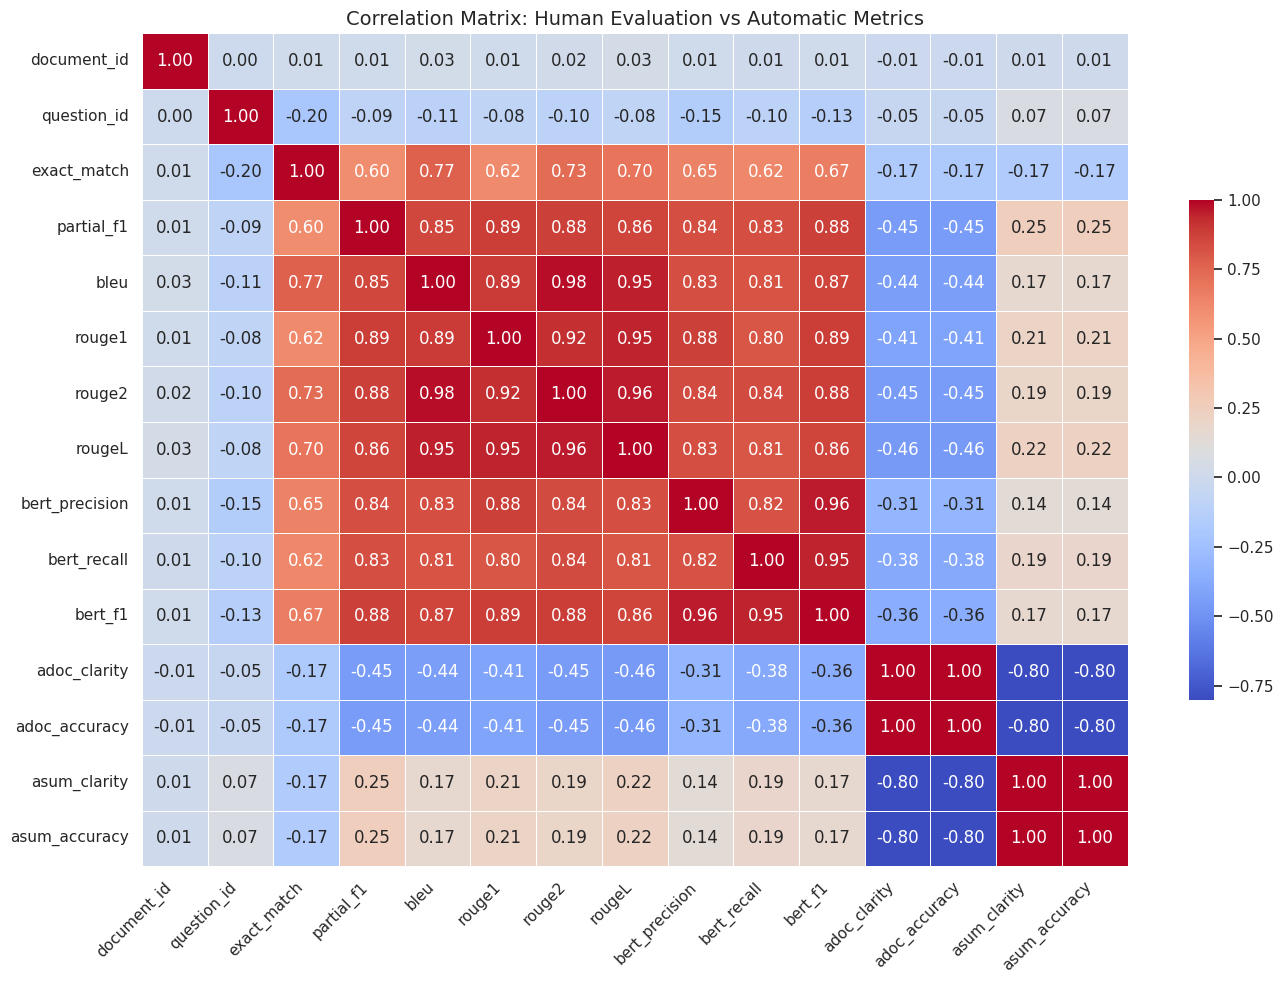

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("consistency_evaluation_results.csv")

numeric_df = df.select_dtypes(include="number")

# Computing the correlation matrix
corr = numeric_df.corr(method="pearson")

# Setting up the plot
plt.figure(figsize=(14, 10))
sns.set(font_scale=1.0)
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={'shrink': 0.6})

# Titles and formatting
plt.title("Correlation Matrix: Human Evaluation vs Automatic Metrics", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


In [ ]:
pubmed_df = pd.read_csv("/workspace/pubmed_questions_with_human_eval.csv")
pubmed_df.head(5)


,document_id,question_id,question,adoc_answer,asum_answer,exact_match,partial_f1,bleu,rouge1,rouge2,...,bert_precision,bert_recall,bert_f1,adoc_supported,asum_supported,adoc_clarity,adoc_accuracy,asum_clarity,asum_accuracy,consistency
0,0,1,1. Who were the researchers involved in creati...,Not mentioned in the document. The document o...,Not mentioned in the document. (The document ...,0,0.539683,0.268630,0.597403,0.346667,...,0.907932,0.896555,0.902208,No,Yes,2,2,4,5,Identical - Say the same thing
1,0,2,2. What type of sequencing libraries were used...,Three to six kilobase shotgun libraries. Not m...,"Not mentioned in the document. However, the d...",0,0.391304,0.116150,0.216216,0.111111,...,0.808560,0.835288,0.821706,No,Yes,2,2,4,5,Identical - Say the same thing
2,0,3,3. When were the sequences for the mt3.5 assem...,February and March 2009. The document mention...,"Not mentioned in the document. However, it is...",0,0.327869,0.099367,0.363636,0.160000,...,0.870608,0.856690,0.863593,Yes,No,4,5,2,2,Contradict each other - Opposing or unrelated ...
3,0,4,4. Why was optical mapping used to anchor and ...,"Not mentioned in the document. However, it is...",Not mentioned in the document. The document d...,0,0.461538,0.217614,0.481013,0.233766,...,0.880702,0.872316,0.876489,No,Yes,2,2,4,5,Identical - Say the same thing
4,0,5,5. How were the contigs ordered in the mt3.5 a...,"Primarily by optical mapping, separately from ...",Not mentioned in the document. The document d...,0,0.246154,0.028675,0.300000,0.051282,...,0.853088,0.856339,0.854710,Yes,No,4,5,2,2,Contradict each other - Opposing or unrelated ...


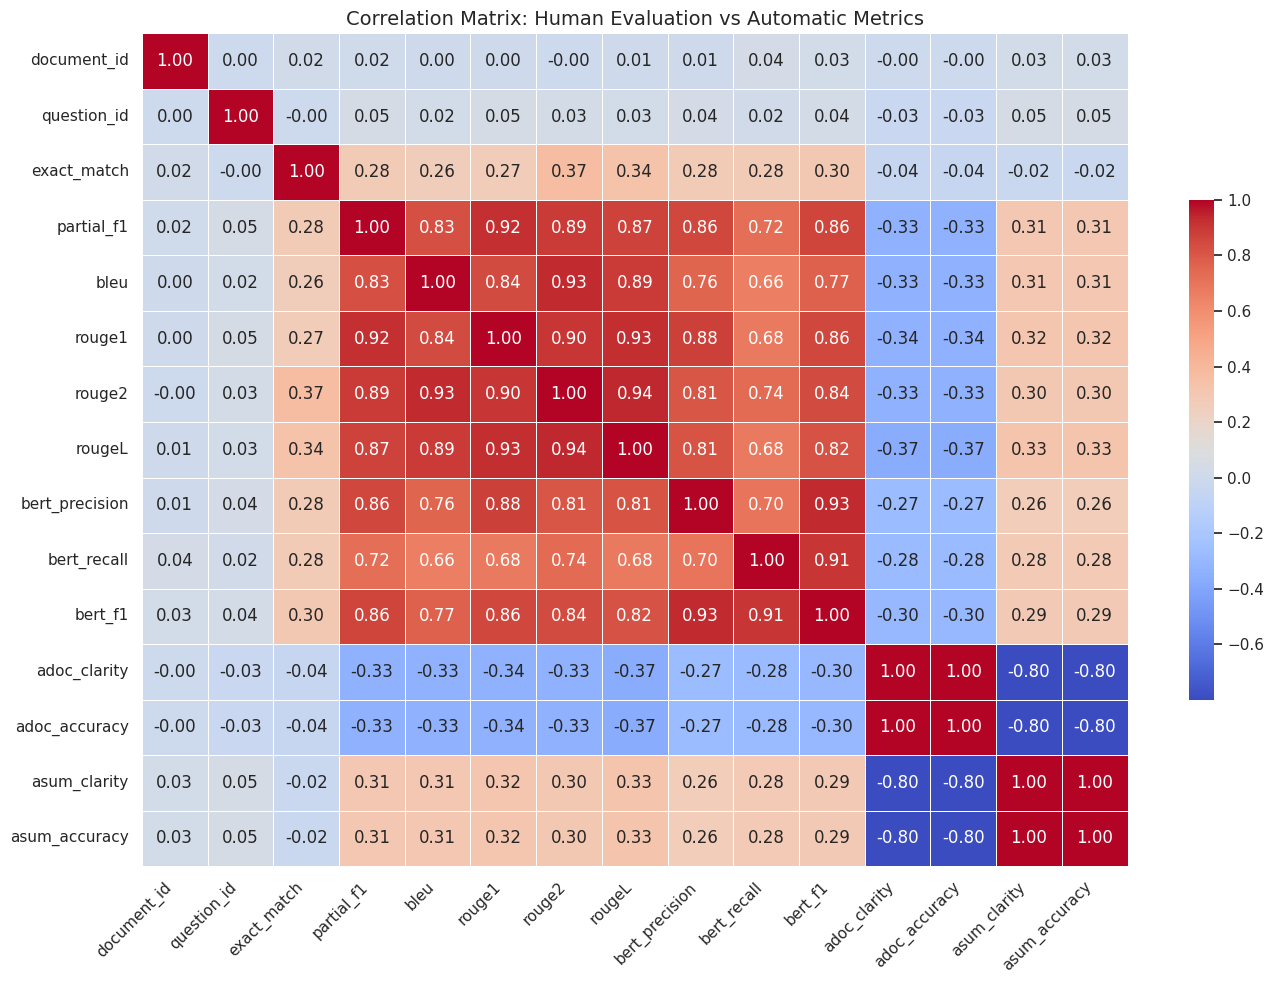

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/workspace/pubmed_questions_with_human_eval.csv")

numeric_df = df.select_dtypes(include="number")

# Computing the correlation matrix
corr = numeric_df.corr(method="pearson")

plt.figure(figsize=(14, 10))
sns.set(font_scale=1.0)
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={'shrink': 0.6})


plt.title("Correlation Matrix: Human Evaluation vs Automatic Metrics", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()


plt.show()
